<a href="https://colab.research.google.com/github/kozoB/breast_cancer_mammography_classification/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Classification Using CNN Model

In this project I aim to identify and classify breast tumors in breast mammographs using the "Breast Cancer" dataset from Kaggle: https://www.kaggle.com/datasets/hayder17/breast-cancer-detection

The dataset is made of images which will be fed to a convolutional network model.

The output consist of 2 labels - either positive (tumor) or negative (no tumor)

The dataset is relativly small, which means obtaining high accuracy will prove difficult

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout

# Import Dataset

In [2]:
!kaggle datasets download -d hayder17/breast-cancer-detection

Dataset URL: https://www.kaggle.com/datasets/hayder17/breast-cancer-detection
License(s): DbCL-1.0
 97% 85.0M/87.2M [00:01<00:00, 71.7MB/s]
100% 87.2M/87.2M [00:01<00:00, 64.9MB/s]


In [3]:
dataset_path = "/content/breast-cancer-detection.zip"

In [4]:
# Extract the zip file
!unzip -q {dataset_path}

In [5]:
train_path = "/content/train"
test_path = "/content/test"

# Split Data To Train And Test Data Sets

In [6]:
image_size = (640, 640)

In [7]:
# Create data generators for training and testing sets
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to the range [0, 1]
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20% of their
    shear_range=0.2,  # Randomly shear images by up to 20 degrees
    zoom_range=0.2,  # Randomly zoom images by up to 20%
    fill_mode='nearest'  # Fill
)

In [8]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255  # Normalize pixel values to the range [0, 1]
)

In [9]:
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,  # Adjust the target size if needed
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,  # Adjust the target size if needed
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 2372 images belonging to 2 classes.
Found 336 images belonging to 2 classes.


# Plot The images

In [10]:
import os

In [11]:
def plot_images():
  for subfolder in os.listdir(train_path):
    file_path = os.path.join(train_path, subfolder)
    print(file_path)
    index = 0
    for image_file in os.listdir(file_path):
      image_path = os.path.join(file_path, image_file)
      image = cv2.imread(image_path)
      plt.imshow(image)
      plt.show()
      index += 1
      if index >= 50:
        break

/content/train/1


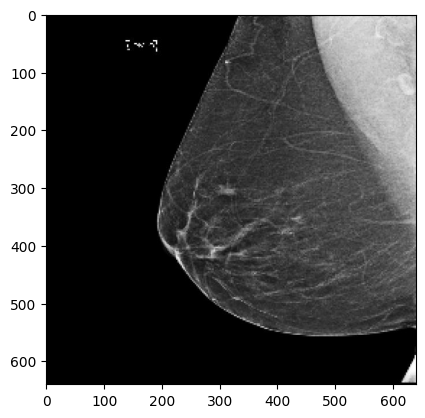

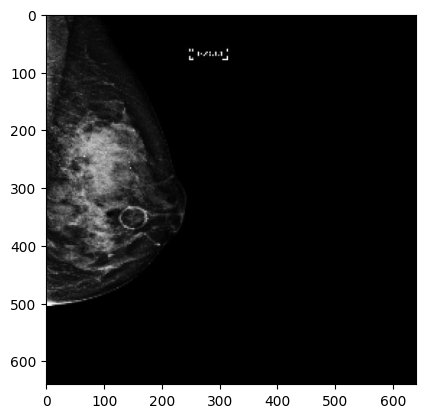

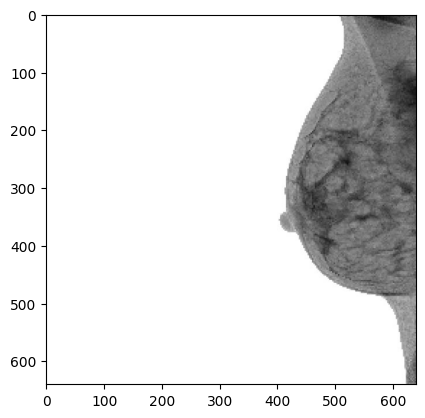

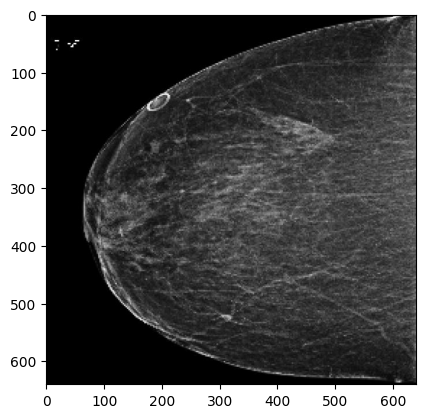

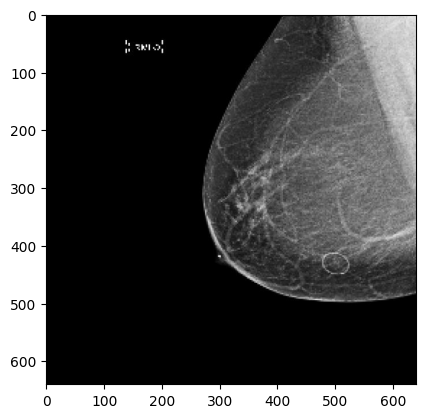

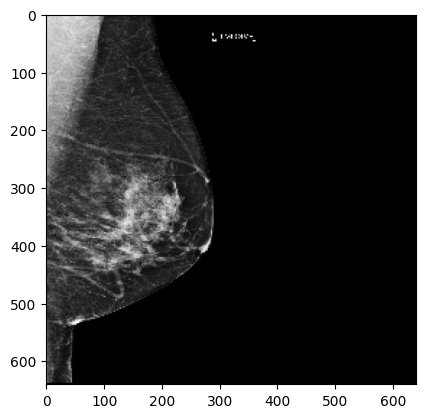

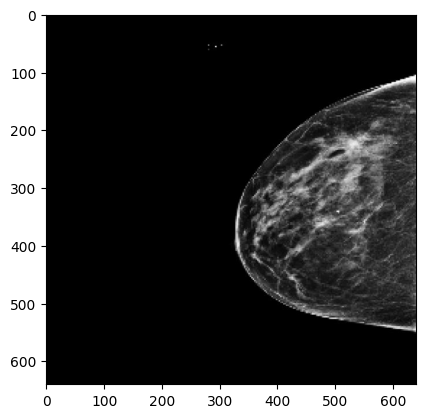

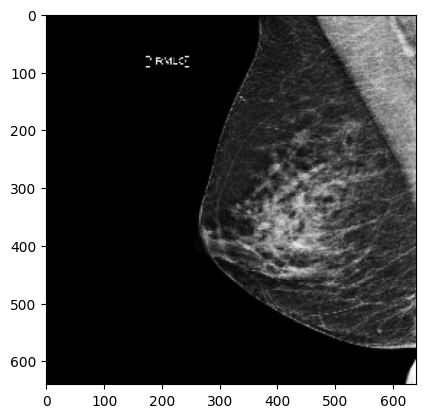

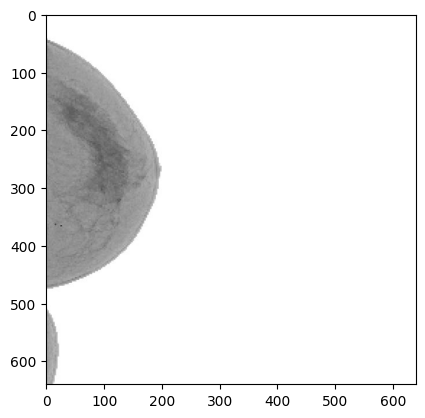

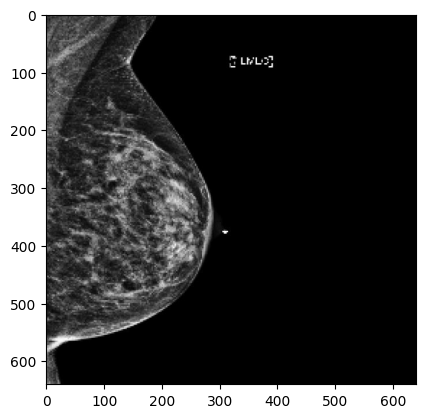

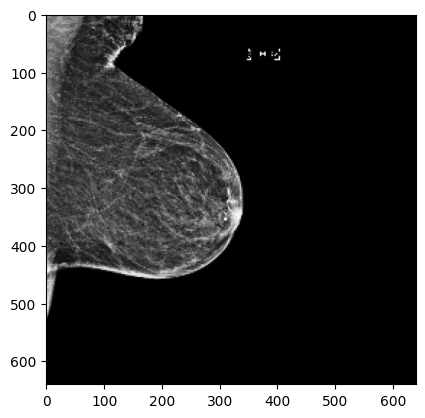

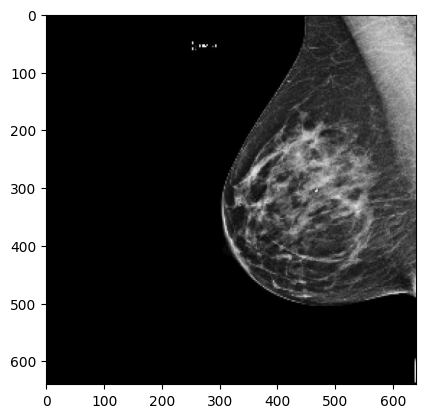

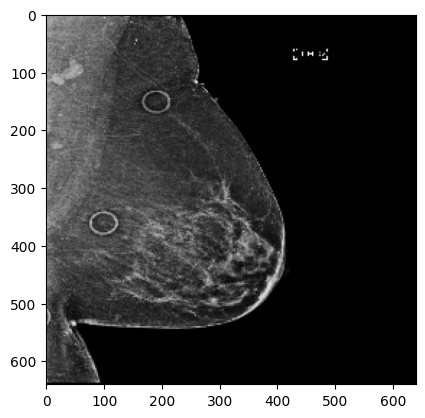

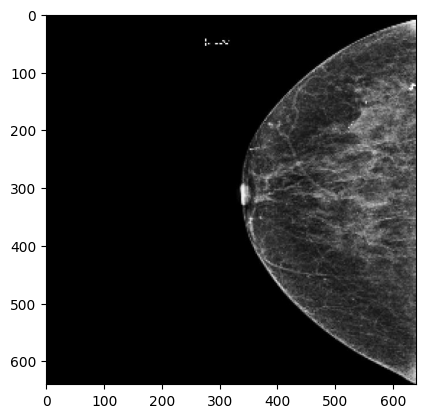

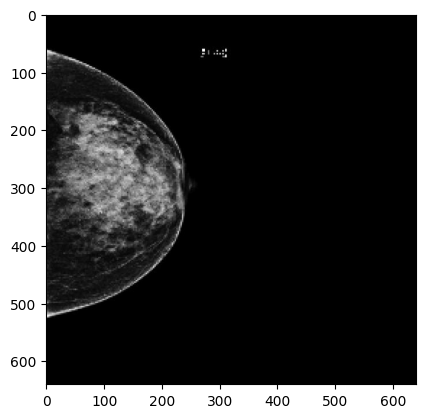

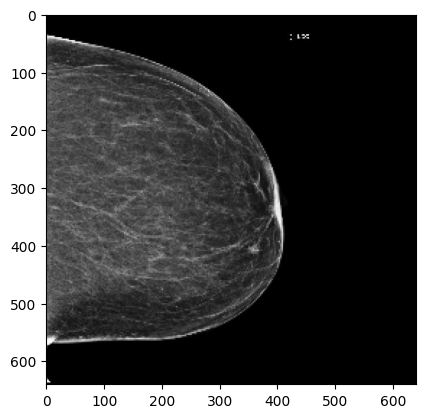

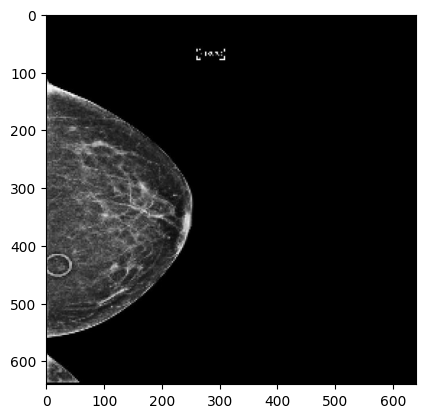

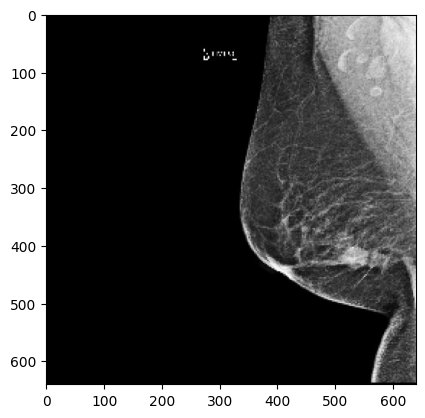

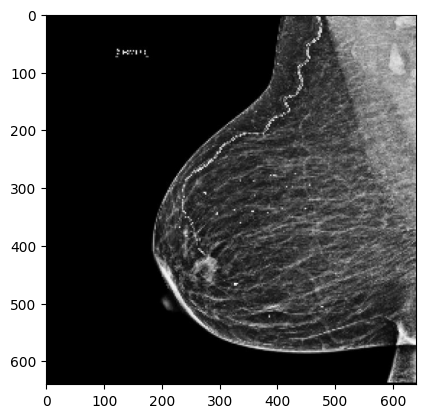

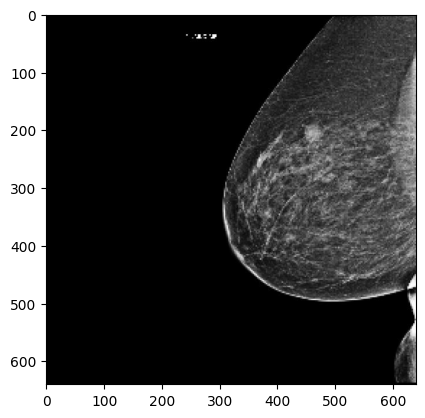

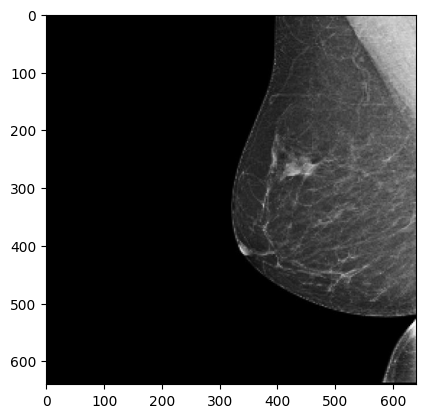

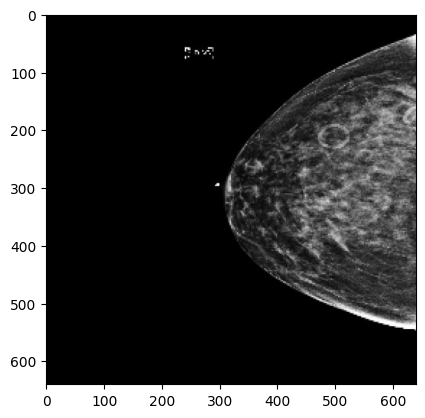

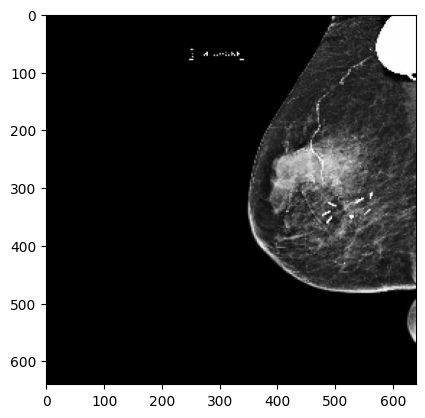

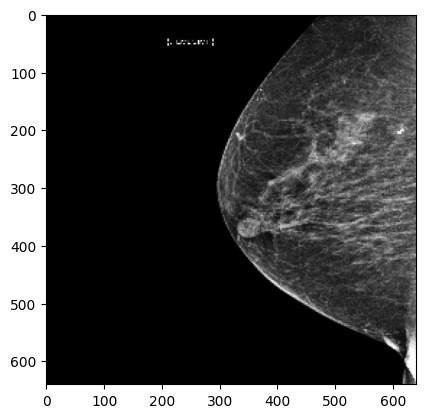

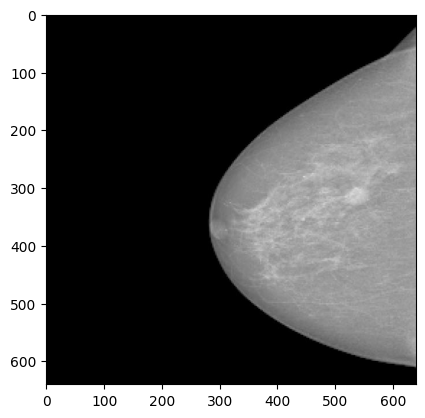

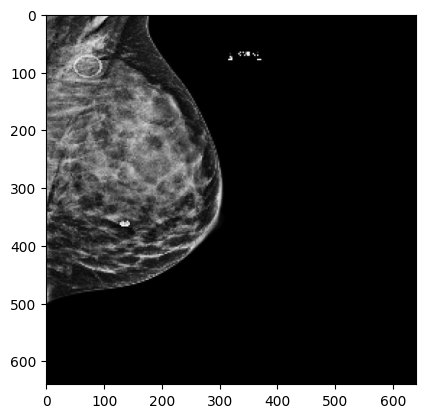

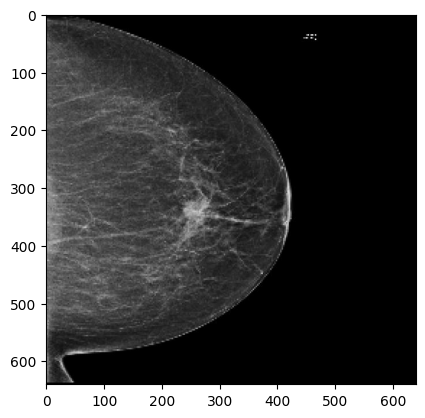

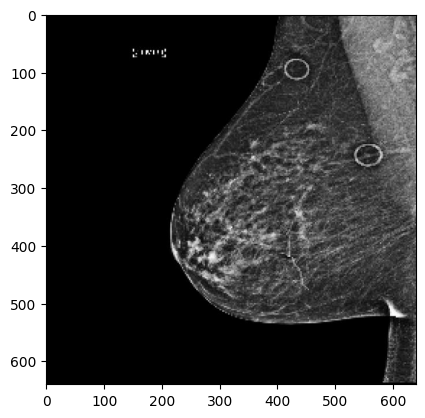

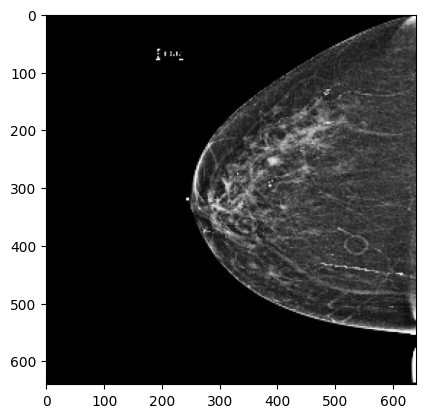

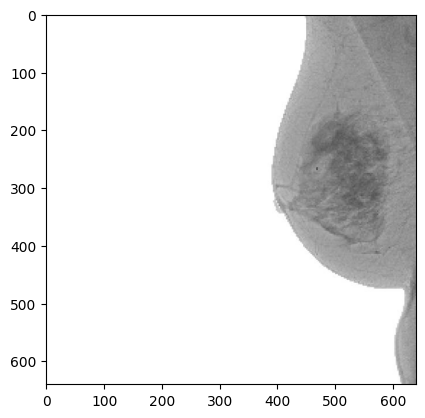

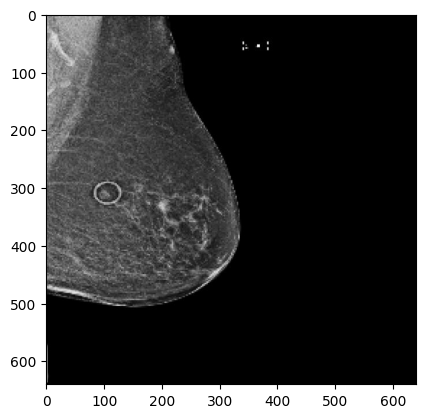

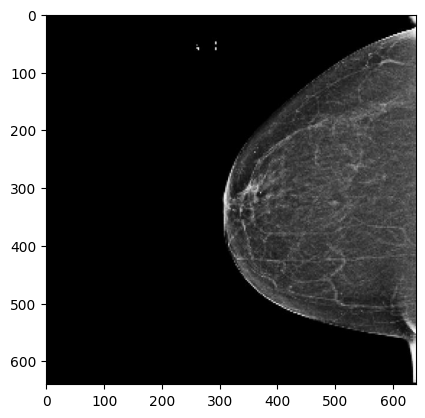

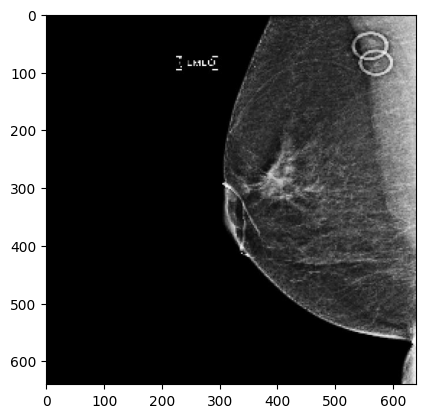

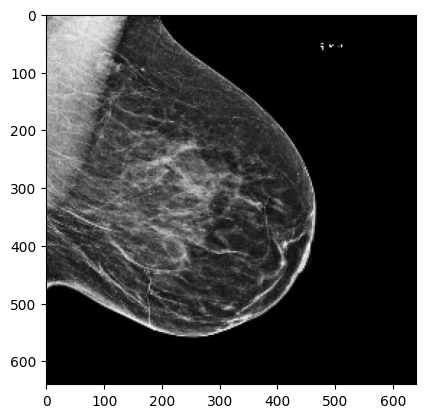

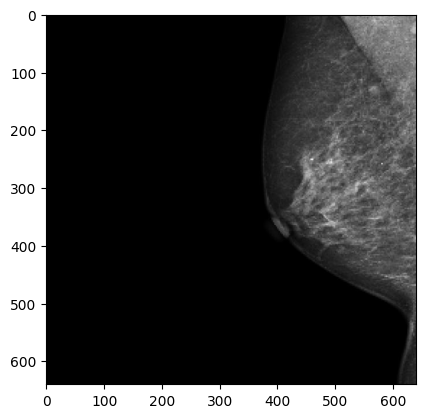

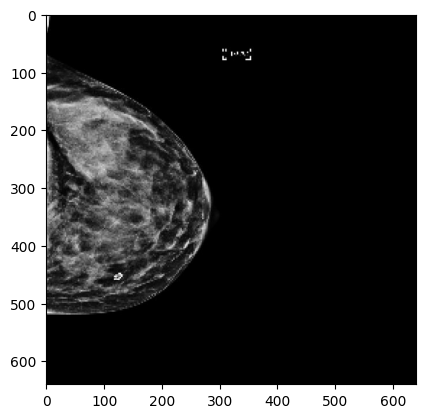

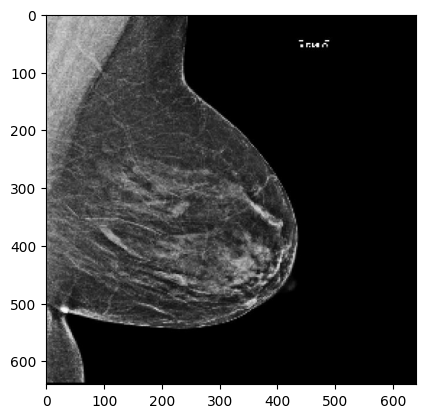

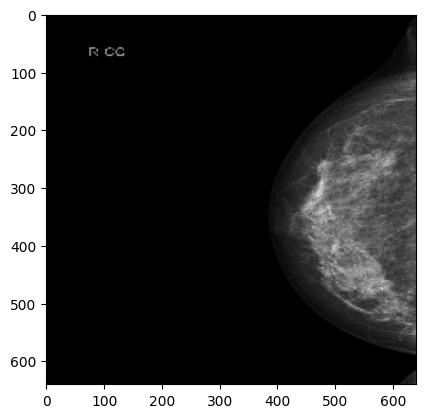

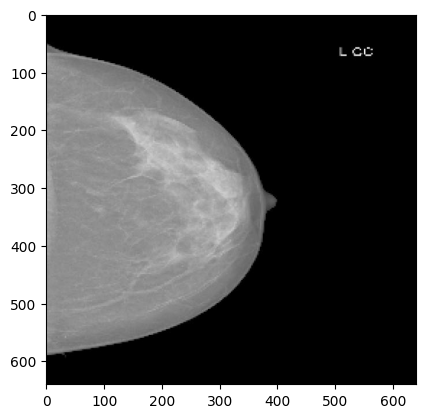

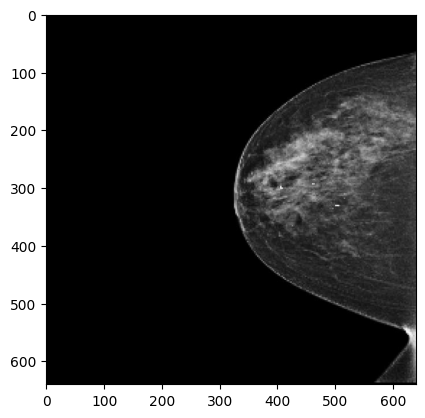

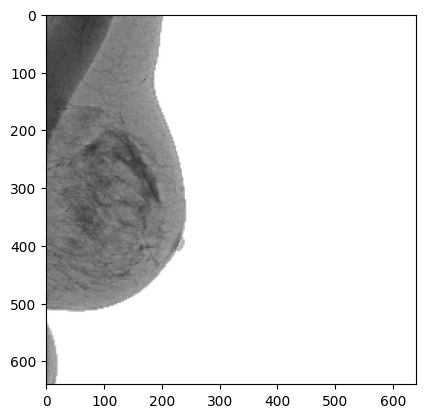

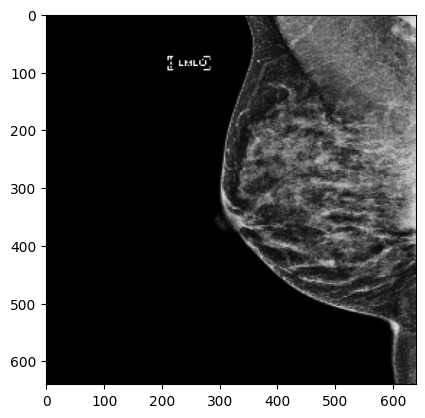

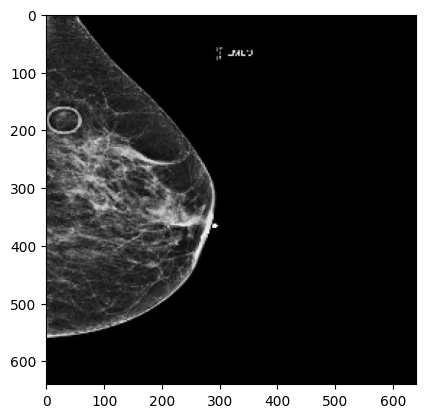

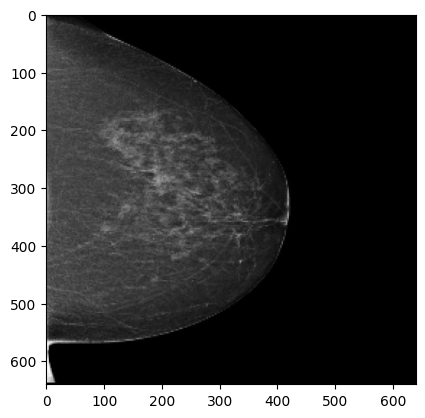

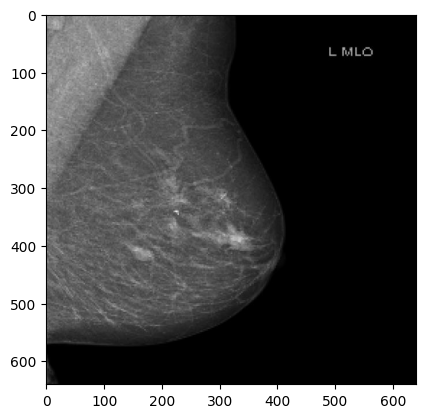

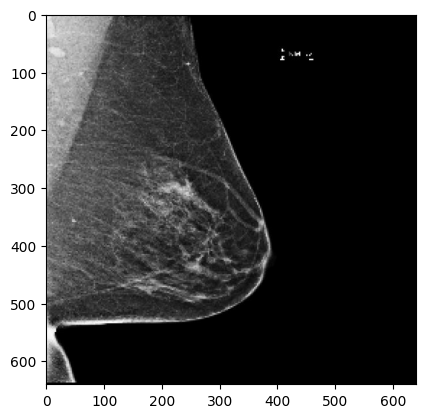

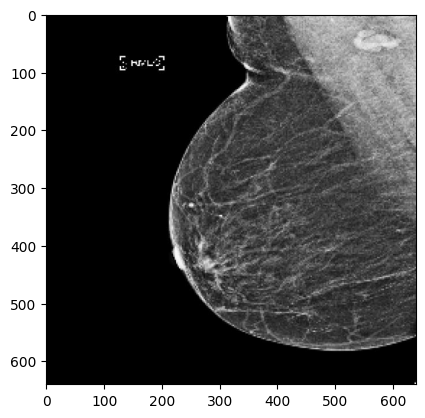

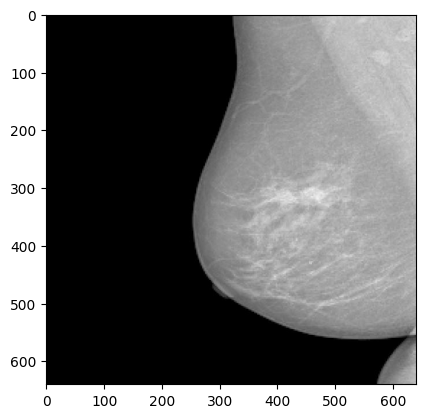

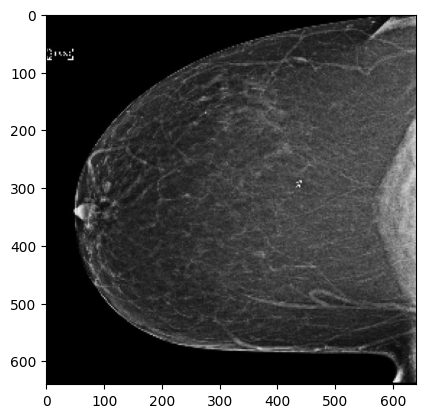

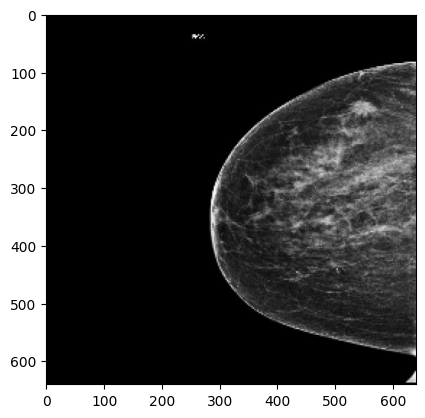

/content/train/0


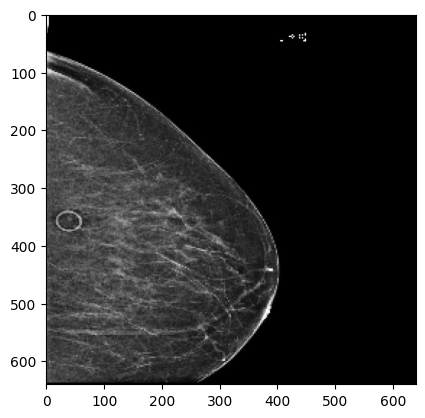

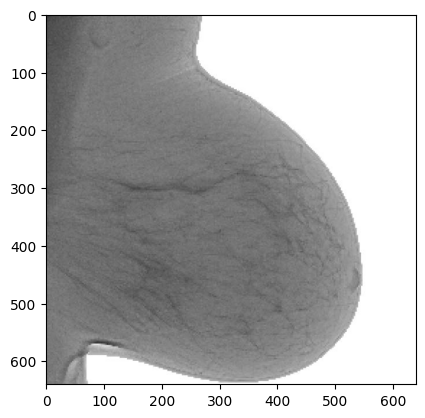

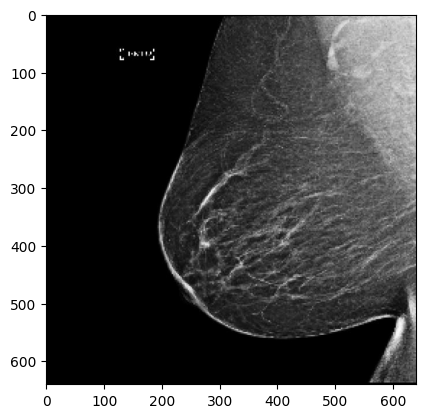

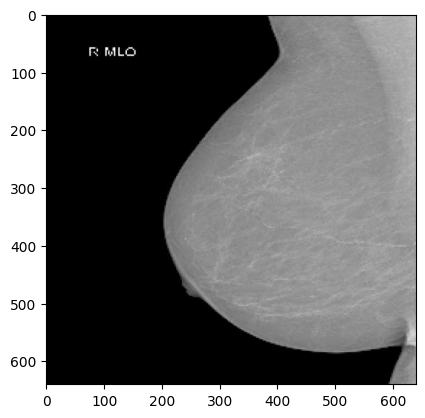

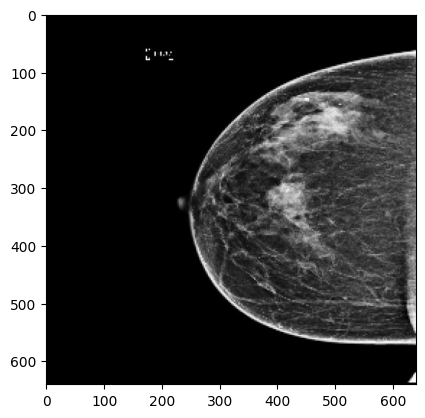

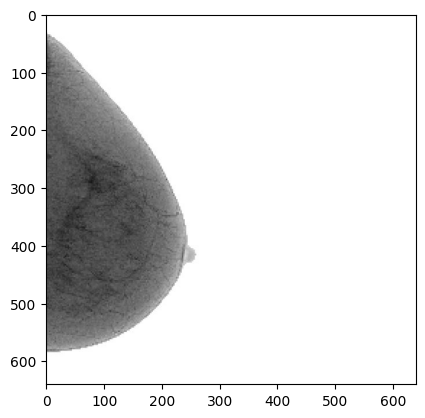

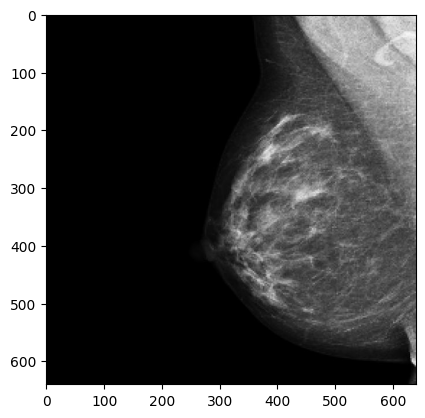

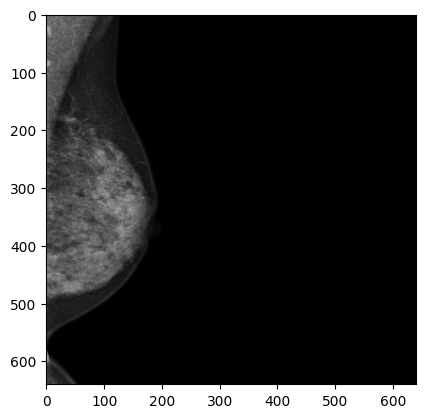

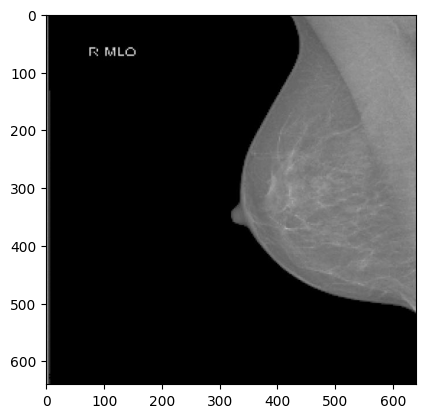

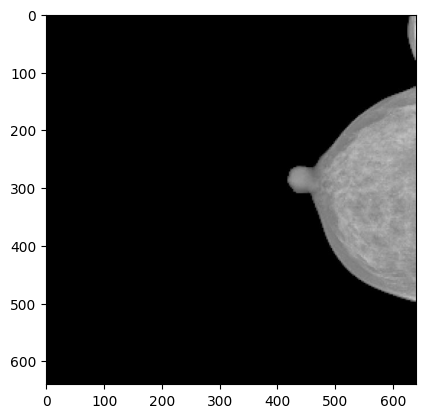

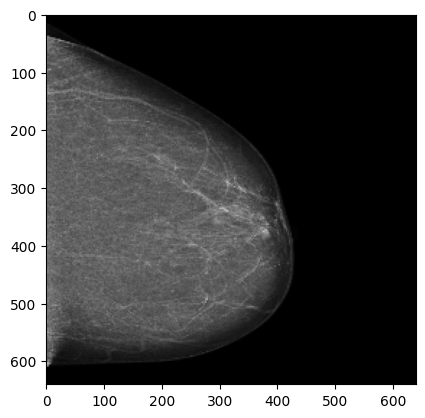

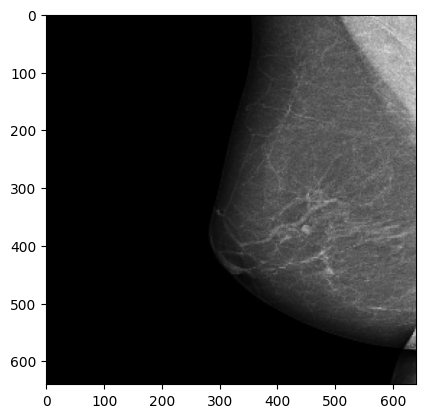

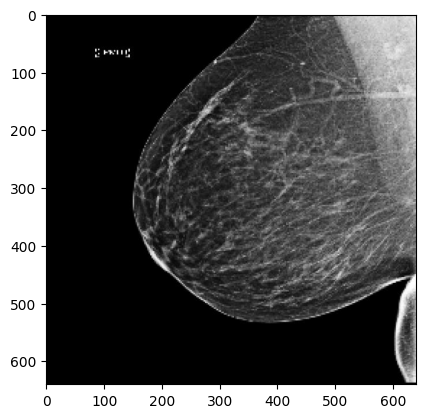

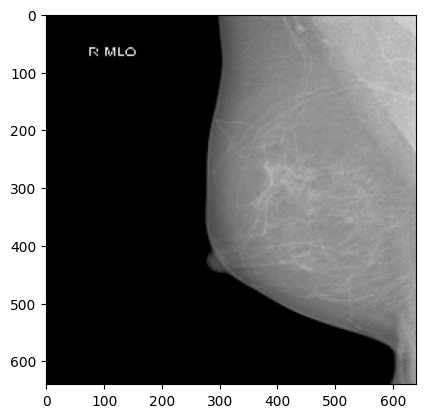

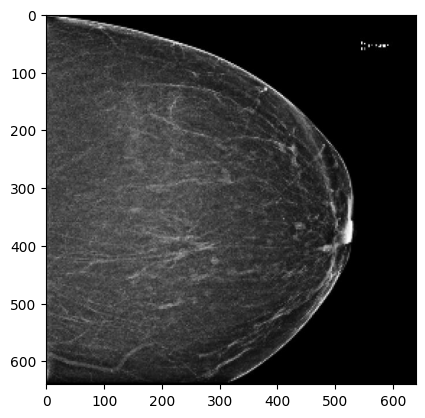

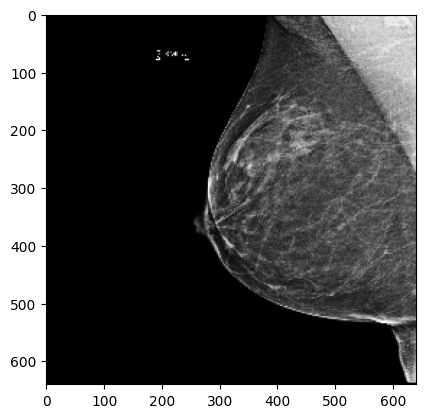

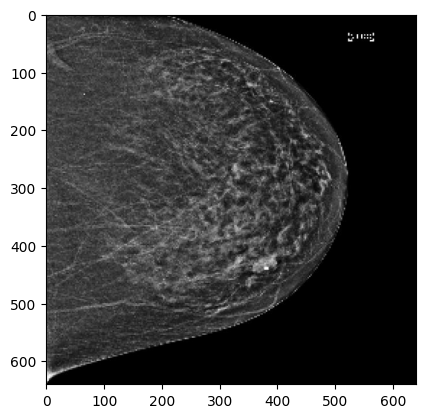

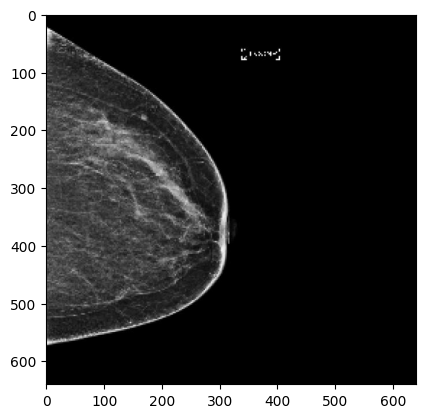

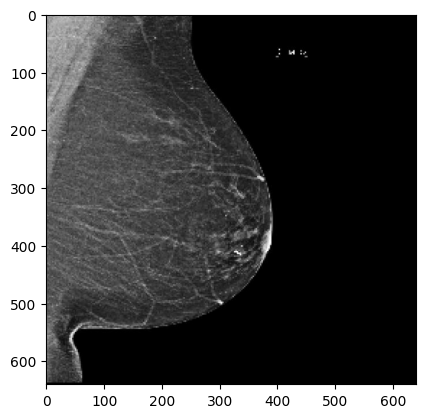

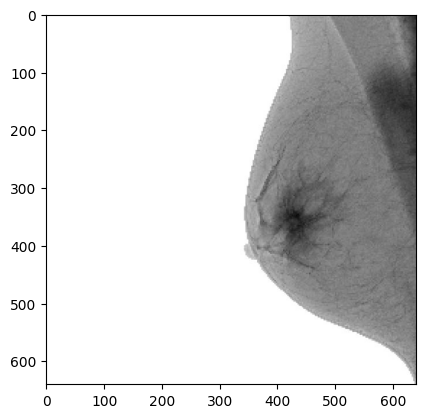

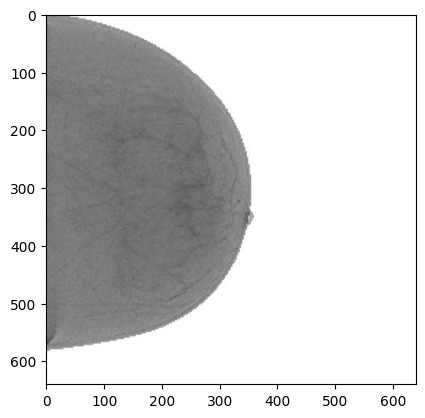

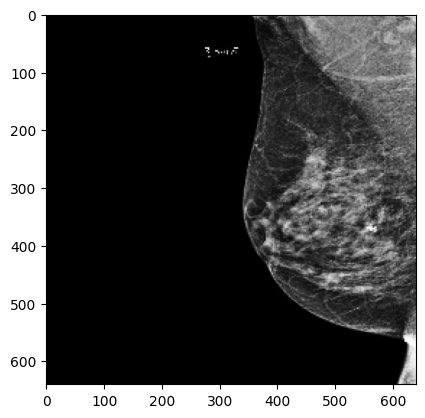

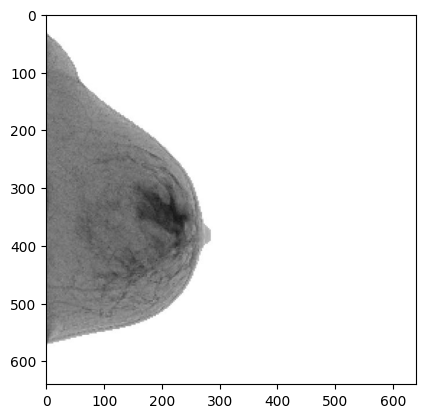

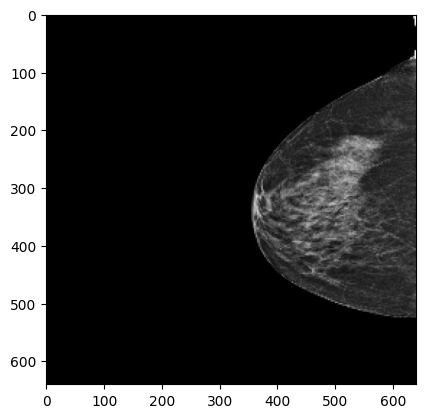

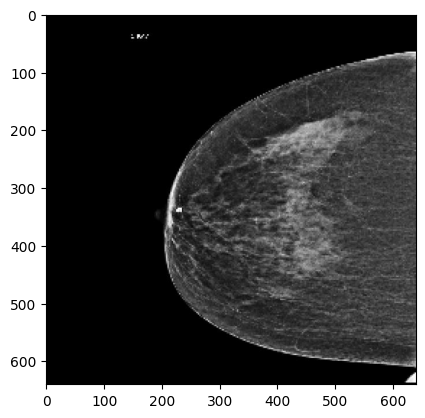

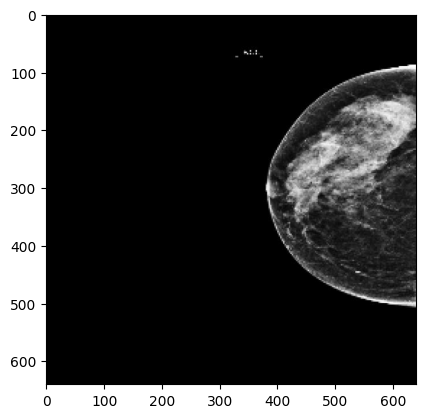

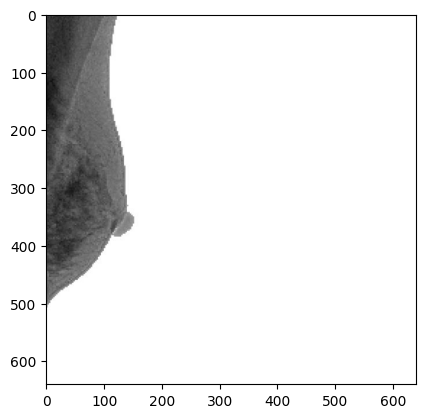

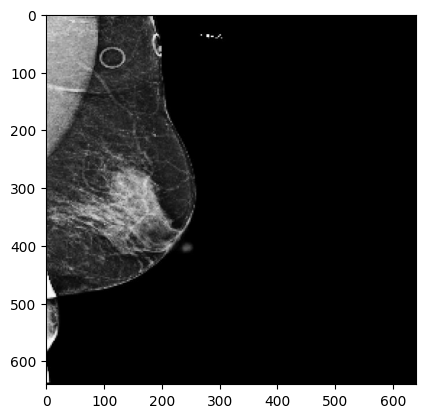

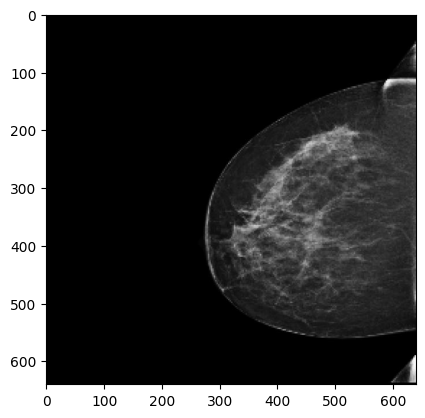

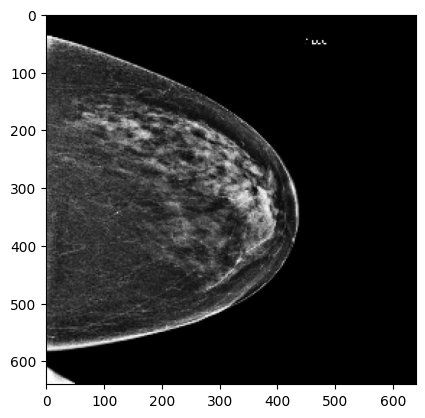

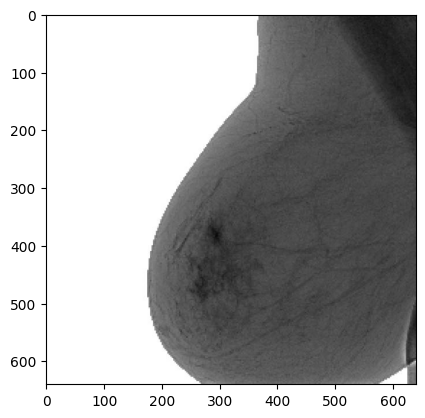

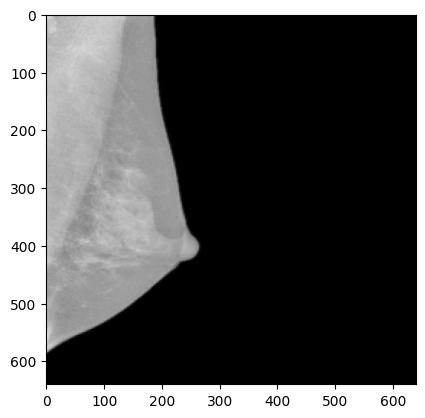

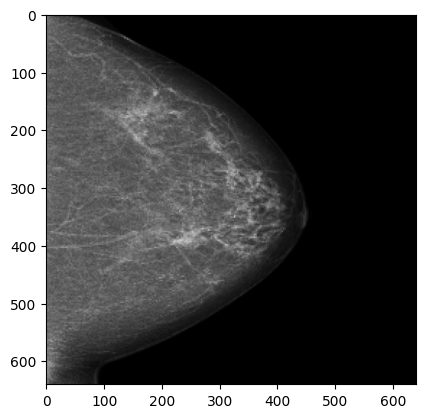

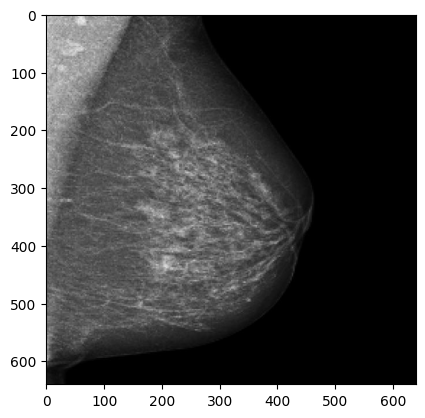

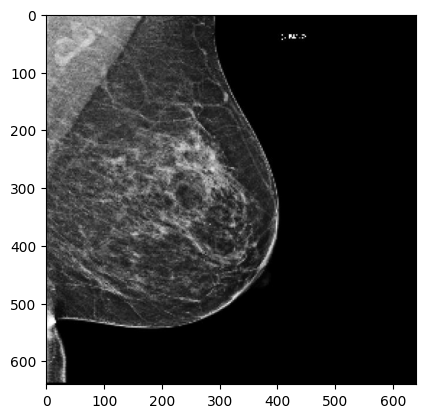

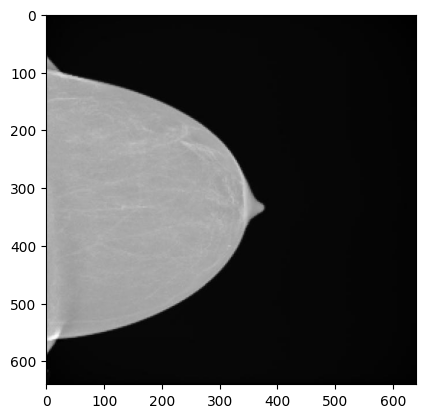

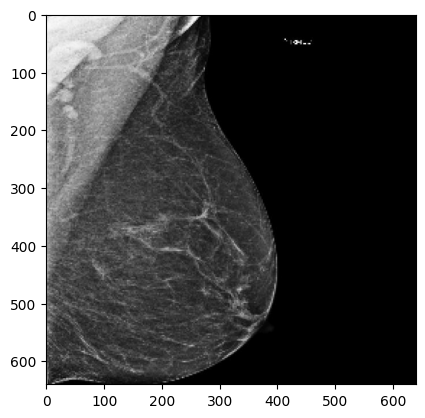

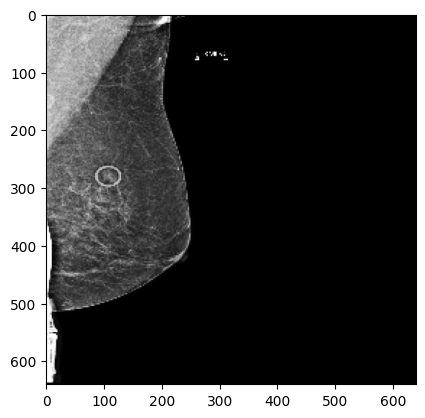

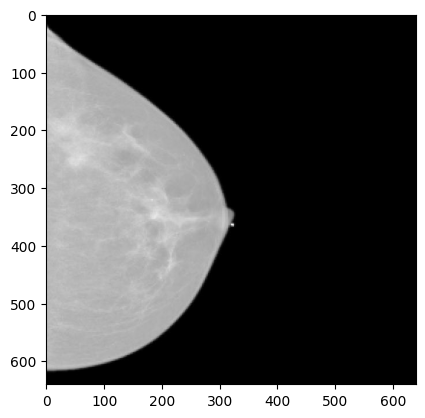

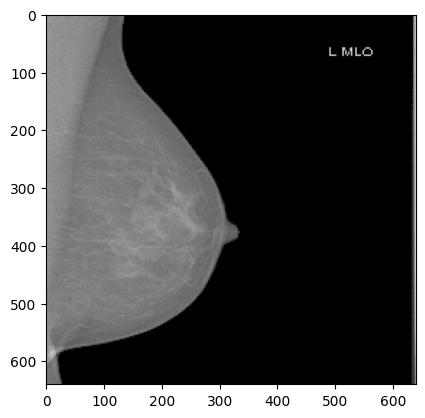

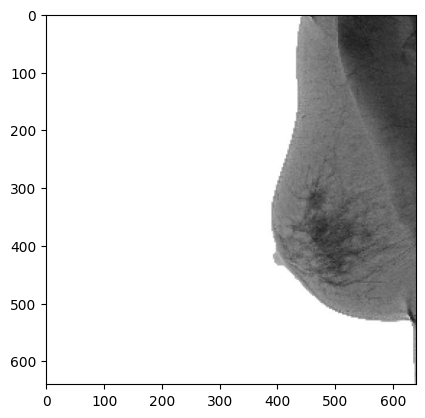

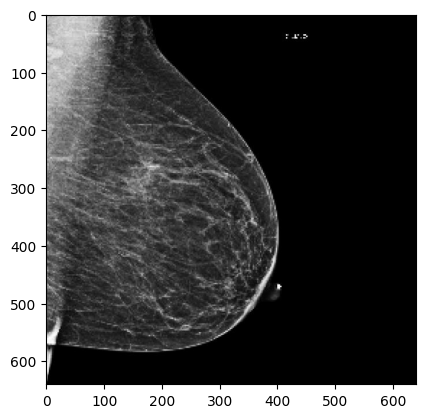

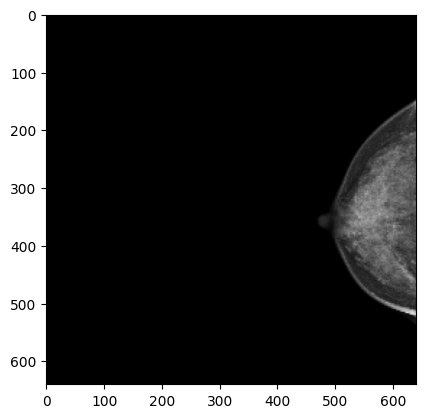

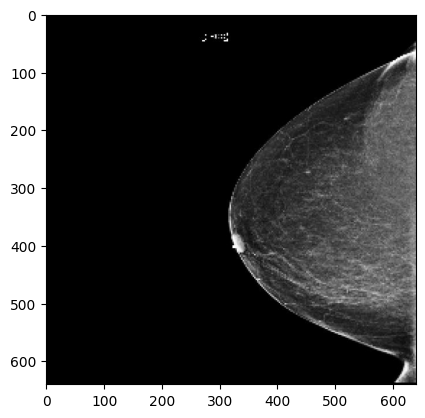

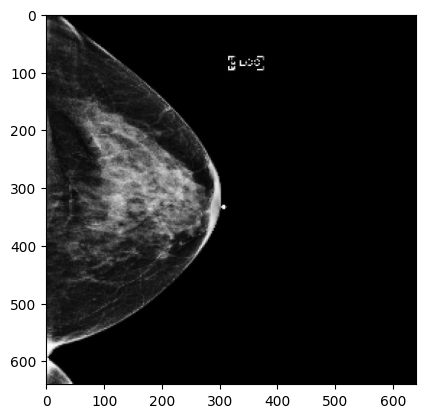

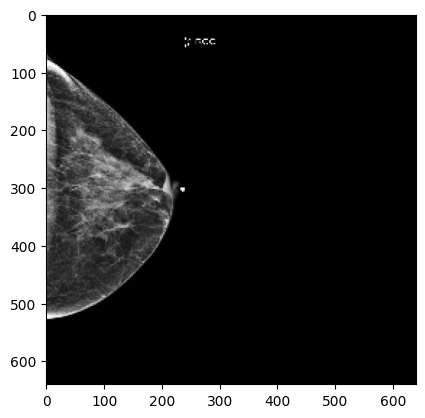

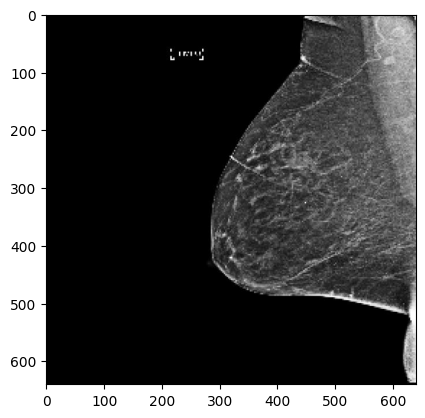

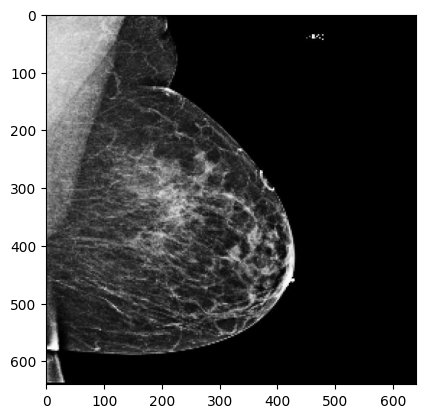

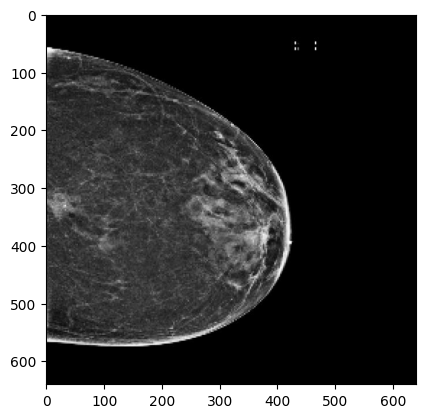

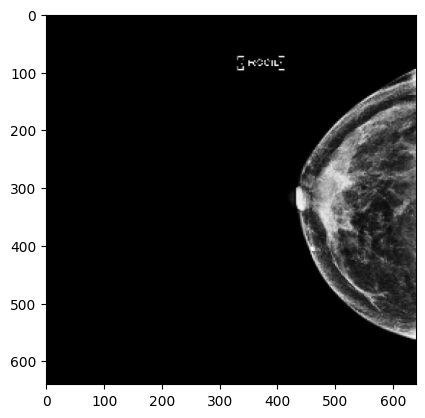

In [12]:
plot_images()

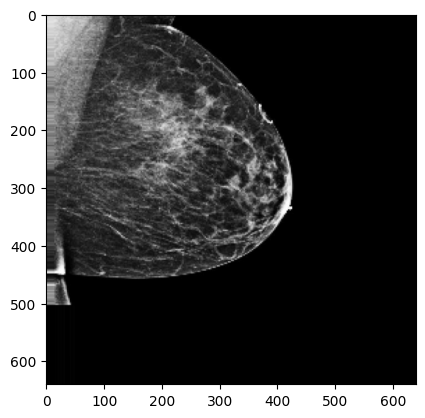

(640, 640, 3)
[[0.832144 0.832144 0.832144]
 [0.832144 0.832144 0.832144]
 [0.832144 0.832144 0.832144]
 ...
 [0.       0.       0.      ]
 [0.       0.       0.      ]
 [0.       0.       0.      ]]


In [13]:
example_image = train_data[0][0][0]
plt.imshow(example_image)
plt.show()
img_as_numpy = np.array(example_image)
print(img_as_numpy.shape)
print(img_as_numpy[0])

# Create CNN Model

In [30]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(640, 640, 3)),
    AveragePooling2D((3, 3), padding='same'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((3, 3), padding='same'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((3, 3), padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')
])



In [15]:
from tensorflow.keras.optimizers import Adam

In [31]:
# Compile the model
model.compile(
    loss='binary_crossentropy',  # Binary classification loss
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 638, 638, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 213, 213, 32)        │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 211, 211, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 71, 71, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 69, 69, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 67712)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       8,667,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,760,770 (33.42 MB)

 Trainable params: 8,760,770 (33.42 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(
    train_data,
    epochs=8,
)

Epoch 1/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.6422 - loss: 0.7094
Epoch 2/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.6677 - loss: 0.6462
Epoch 3/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.6618 - loss: 0.6461
Epoch 4/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.6479 - loss: 0.6410
Epoch 5/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.6620 - loss: 0.6375
Epoch 6/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.6563 - loss: 0.6340
Epoch 7/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.6521 - loss: 0.6345
Epoch 8/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.6759 - loss: 0.6385


In [40]:
# Evaluate the model on the validation or test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 326ms/step - accuracy: 0.5976 - loss: 0.6596
Test Loss: 0.6566042900085449
Test Accuracy: 0.6160714030265808


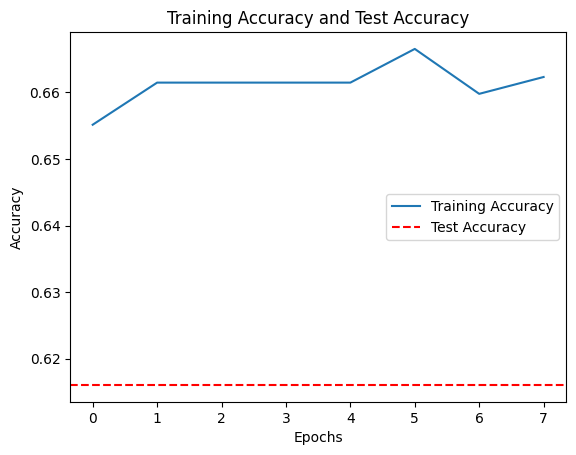

In [41]:
# Plot training accuracy
training_accuracy = history.history['accuracy']

# Create a plot
plt.plot(training_accuracy, label='Training Accuracy')

# Plot test accuracy as a horizontal line
plt.axhline(y=test_accuracy, color='red', linestyle='--', label='Test Accuracy')

# Add title and labels
plt.title('Training Accuracy and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Add a legend
plt.legend()

# Display the plot
plt.show()